In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = "C:/Users/schiavaz/lava-nc/depth/"
dataset = "data/esim_data/line_top/"

In [3]:
gt = np.loadtxt(path + dataset + "groundtruth.txt")

In [4]:
imu = np.loadtxt(path + dataset + "imu.txt")

In [5]:
imu_txyz = imu[:, :4]
imu_txyz[:,3] -= 9.81

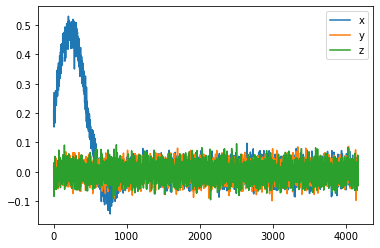

In [6]:
plt.plot(imu_txyz[:, 1], label="x")
plt.plot(imu_txyz[:, 2], label="y")
plt.plot(imu_txyz[:, 3], label="z")
plt.legend()

In [7]:
gt_txyz = gt[:, :4]

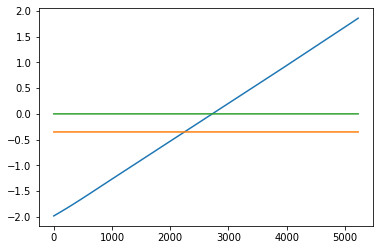

In [8]:
plt.plot(gt_txyz[:, 1])
plt.plot(gt_txyz[:, 2])
plt.plot(gt_txyz[:, 3])

In [62]:
a = 1
vel_xyz_gt = (gt_txyz[a:,1:] - gt_txyz[:-a, 1:]) / (gt_txyz[a:,0] - gt_txyz[:-a,0])[:,None]

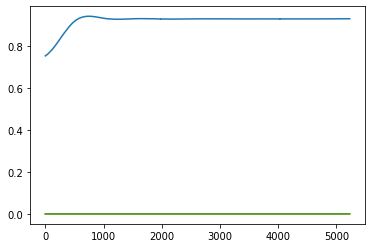

In [63]:
# plt.figure(figsize=(10, 10))
plt.plot(vel_xyz_gt[:, 0])
plt.plot(vel_xyz_gt[:, 1])
plt.plot(vel_xyz_gt[:, 2])

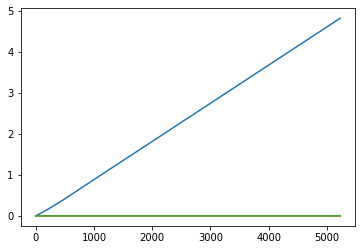

In [64]:
pos_xyz_gt_rec = np.cumsum(vel_xyz_gt * 0.001, axis=0)
plt.plot(pos_xyz_gt_rec[:, 0])
plt.plot(pos_xyz_gt_rec[:, 1])
plt.plot(pos_xyz_gt_rec[:, 2])

In [74]:
dt = 0.001
initial_vel = vel_xyz_gt[0]
imu_xyz_init = np.vstack([initial_vel, imu_txyz[:,1:]*dt])

In [75]:
vel_xyz_imu = np.cumsum(imu_xyz_init, axis=0)

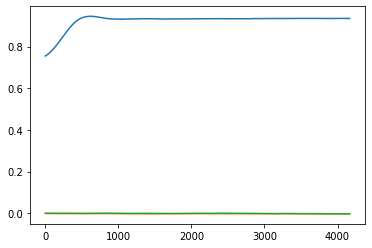

In [78]:
plt.plot(vel_xyz_imu[:, 0])
plt.plot(vel_xyz_imu[:, 1])
plt.plot(vel_xyz_imu[:, 2])

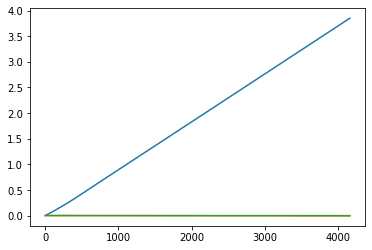

In [79]:
pos_xyz_imu_rec = np.cumsum(vel_xyz_imu * 0.001, axis=0)
plt.plot(pos_xyz_imu_rec[:, 0])
plt.plot(pos_xyz_imu_rec[:, 1])
plt.plot(pos_xyz_imu_rec[:, 2])

In [80]:
vel_xyz_gt.shape

(5228, 3)

In [81]:
imu_txyz.shape

(4166, 4)

In [82]:
diff = np.zeros_like(imu_txyz[:,1:])

In [85]:
for i, t in enumerate(imu_txyz[:,0]):
    imu_vel = vel_xyz_imu[i]
    gt_idx = np.searchsorted(gt[100:,0], t)
    gt_vel = vel_xyz_gt[gt_idx]
    diff[i] = np.abs(imu_vel - gt_vel)

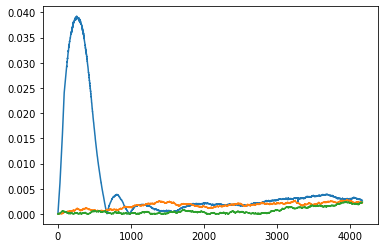

In [86]:
plt.plot(diff[:, 0])
plt.plot(diff[:, 1])
plt.plot(diff[:, 2])

In [34]:
diff[1000:,0].mean()

0.9300586614097439

In [20]:
t

array([0.421297  , 0.01452738, 0.02118748])

In [21]:
t[[0,1]] = t[[1, 0]]

In [45]:
(gt[1:, 0] - gt[:-1, 0]).mean()

0.0007966717672149964

In [47]:
(imu[1:, 0] - imu[:-1, 0]).mean()

0.000999999999759904

In [87]:
import gtd2d.runner.flow_utils as utils

In [93]:
print(utils.vel_at_time(gt, 2.5, imu=False))

[2.5        0.93101352 0.         0.         0.         0.
 0.        ]


In [94]:
print(utils.vel_at_time(np.c_[imu[:, 0], vel_xyz_imu[1:]], 2.0, imu=True))

[ 2.00100000e+00  9.33055766e-01 -1.50494810e-03 -3.34885683e-04]
